# Taxi Dataset Analysis

## Library Imports

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Imports

In [50]:
df = sns.load_dataset('taxis')

In [51]:
df.head()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6433 entries, 0 to 6432
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   pickup           6433 non-null   datetime64[ns]
 1   dropoff          6433 non-null   datetime64[ns]
 2   passengers       6433 non-null   int64         
 3   distance         6433 non-null   float64       
 4   fare             6433 non-null   float64       
 5   tip              6433 non-null   float64       
 6   tolls            6433 non-null   float64       
 7   total            6433 non-null   float64       
 8   color            6433 non-null   object        
 9   payment          6389 non-null   object        
 10  pickup_zone      6407 non-null   object        
 11  dropoff_zone     6388 non-null   object        
 12  pickup_borough   6407 non-null   object        
 13  dropoff_borough  6388 non-null   object        
dtypes: datetime64[ns](2), float64(5), int64(

In [53]:
df.describe()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total
count,6433,6433,6433.000000,6433.000000,6433.000000,6433.00000,6433.000000,6433.000000
mean,2019-03-16 08:31:28.514223616,2019-03-16 08:45:49.491217408,1.539251,3.024617,13.091073,1.97922,0.325273,18.517794
min,2019-02-28 23:29:03,2019-02-28 23:32:35,0.000000,0.000000,1.000000,0.00000,0.000000,1.300000
25%,2019-03-08 15:50:34,2019-03-08 16:12:51,1.000000,0.980000,6.500000,0.00000,0.000000,10.800000
50%,2019-03-15 21:46:58,2019-03-15 22:06:44,1.000000,1.640000,9.500000,1.70000,0.000000,14.160000
75%,2019-03-23 17:41:38,2019-03-23 17:51:56,2.000000,3.210000,15.000000,2.80000,0.000000,20.300000
max,2019-03-31 23:43:45,2019-04-01 00:13:58,6.000000,36.700000,150.000000,33.20000,24.020000,174.820000
std,NaN,NaN,1.203768,3.827867,11.551804,2.44856,1.415267,13.815570


In [54]:
df.describe(include='O')

,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
count,6433,6389,6407,6388,6407,6388
unique,2,2,194,203,4,5
top,yellow,credit card,Midtown Center,Upper East Side North,Manhattan,Manhattan
freq,5451,4577,230,245,5268,5206


In [55]:
df.isna().sum()

pickup              0
dropoff             0
passengers          0
distance            0
fare                0
tip                 0
tolls               0
total               0
color               0
payment            44
pickup_zone        26
dropoff_zone       45
pickup_borough     26
dropoff_borough    45
dtype: int64

In [56]:
df.shape

(6433, 14)

## Data Cleaning

As a general rule, if a column is missing less than 5% of the data, then the rows with missing data can be dropped, so let's see what the threshold is to drop missing data rows. 

In [57]:
np.round(0.05 * 6433)

np.float64(322.0)

So if a column is missing less than 322 values, we can drop the missing values. 

All the columns with missing data are missing less than 50 values, which is only 0.77% of the data, so we can drop those values. 

Most of the missing values are from pick up and drop off locations, as well as payment method. We will see just how much of the data we are losing by dropping the missing values. 

In [58]:
df_copy = df.copy() 
# copy of original df so we can plot the data with missing data, as well as without. 

In [59]:
df = df.dropna()

In [60]:
df.shape

(6341, 14)

The original shape of the data indicated 6433 rows, and after droping missing values, it was reduced to 6341 rows. This means we reduced the data size by 1.4%. Not a huge loss. 

Now, we will see how some of the important numerical columns change when we drop outliers. We are fine to drop some outliers if the number is small, but we will see if it is worth it or not. 

In [61]:
# fig, ax = plt.subplots(1, 2, figsize=(10, 7))
# ax1 = sns.barplot(data=df_copy, x='payment', y='fare', ax=ax[0])
# ax2 = sns.barplot(data=df, x='payment', y='fare', ax=ax[1])

# ax1.set_title("Original Payment Counts")
# ax1.bar_label(ax1.containers[0])

# ax2.set_title("Payment Counts w/o Missing Values")
# ax2.bar_label(ax1.containers[0])

In [62]:
def remove_outliers(data, column):
    """
    Creator: Daniel
    Inputs:
        data: dataframe
        column: column_name
    Outputs:
        returns the dataframe, but with the outliers filtered out. 
    """
    Q1 = data[column].quantile(0.25) # 25th percentile 
    Q3 = data[column].quantile(0.75) # 75th percentile
    
    IQR = Q3 - Q1 # Interquartile range
    
    lower_bound = Q1 - (1.5 * IQR) # lower bound. anything below this is an outlier
    upper_bound = Q3 + (1.5 * IQR) # upper bound. anything above this is an outlier

    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)] # filters out the outliers for the column. 

### We will start with the `tip` column

In [63]:
col = 'tip'

In [64]:
def plot_outlier_difference(col):
    data_filter = remove_outliers(df, col)
    
    fig, ax = plt.subplots(1, 2, figsize=(10, 4))
    ax1 = sns.histplot(data=df, x=col, ax=ax[0], kde=True, color='red')
    ax2 = sns.histplot(data=data_filter, x=col, ax=ax[1], kde=True, color='green')
    
    ax1.set_title(f"Original {col} {df.shape}")
    # ax1.bar_label(ax1.containers[0])
    
    ax2.set_title(f"Removed Outliers from {col} {data_filter.shape}")
    # ax2.bar_label(ax1.containers[0])

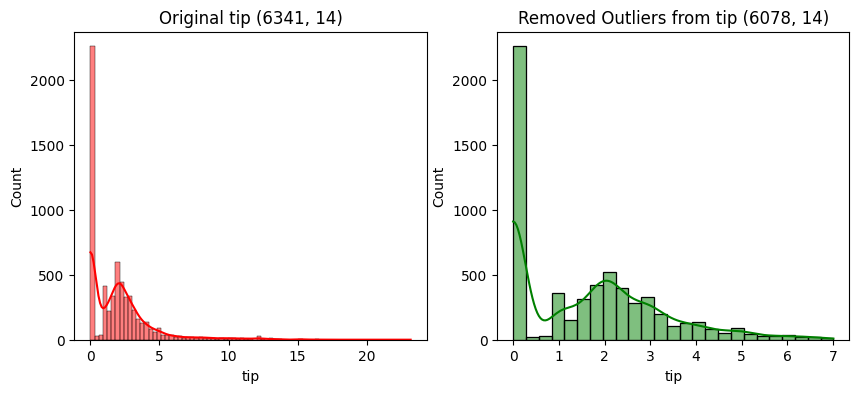

In [65]:
plot_outlier_difference(col)
plt.savefig('./images/tip_diff.png')

We can see that we end up losing ~300 more rows of data if we drop the tip outliers, essentially removing any tip over $7. 

### Next, let's see the difference in `total`

In [66]:
col = 'total'

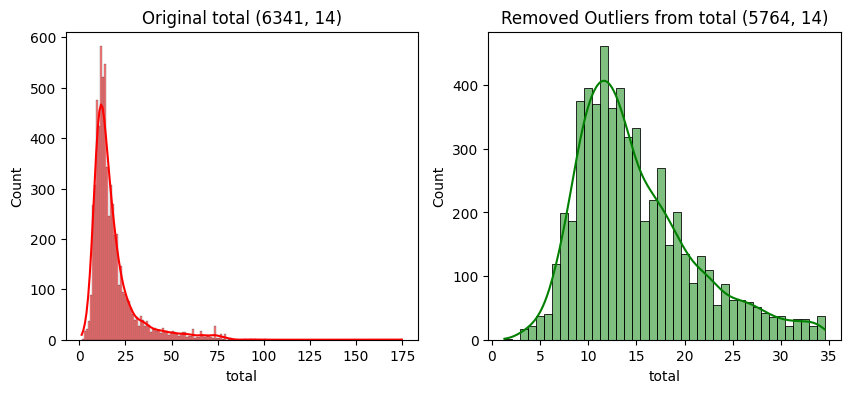

In [67]:
plot_outlier_difference('total')
plt.savefig('./images/total_diff.png')

For the `total` column, we lose alot more rows, almost 600 rows. It removes anything above $35, meaning that high costing trips are not normal. 

### Since high totals are not normal, let's see what happens when we remove outliers from `distance`

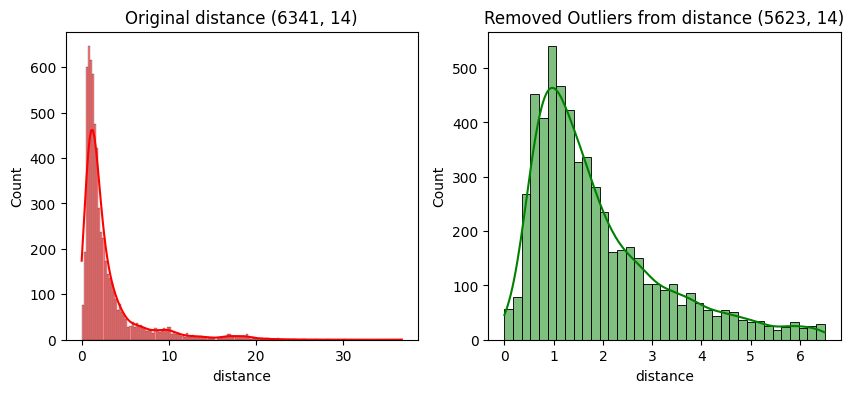

In [68]:
plot_outlier_difference('distance')
plt.savefig('./images/distance_diff.png')

When removing outliers from distance, we lose around 700 rows, anything more than 6 miles, which means that 7+ mile trips are also not common. 

In all these cases, the outliers seem to be legitimate values, so there is no reason to drop them, but this does give us insight into what an abnormal taxi trip would be in terms of price, distance, etc. 

## Feature Engineering

When I get to my modeling, I am going to attempt to make a prediction of the `fare` amount, without considering the monetary columns (tips, tolls, total, etc.). 

Due to this, some important features will be 
- duration in minutes
- hour of the day
- day of the week (based on pickup time)

so let's add some columns to get that calculation

### Duration in minutes

In [69]:
df['time_duration'] = df['dropoff'] - df['pickup']

In [70]:
df['duration_in_minutes'] = df['time_duration'].dt.total_seconds() / 60

### Hour of the day

In [71]:
df['trip_hour'] = df['pickup'].dt.hour

### Day of the Week

In [72]:
df['trip_day'] = df['pickup'].dt.strftime('%A')

In [73]:
df['trip_day_num'] = df['pickup'].dt.strftime('%w')

## Exploratory Data Analysis

### Questions

- What day of the week has the highest average fare?
- What is the average trip duration by day?
- Where are most customers picked up / dropped off?
- Which color taxi gets the highest fares?
- What are the busiest times (hours)

In [74]:
weekday_order=  ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
# order of weekdays for plots to be in order

### What day of the week has the highest average fare?

C:\Users\danie\AppData\Local\Temp\ipykernel_46540\2806106851.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df, x='trip_day', y='fare', order=weekday_order, palette='Reds')


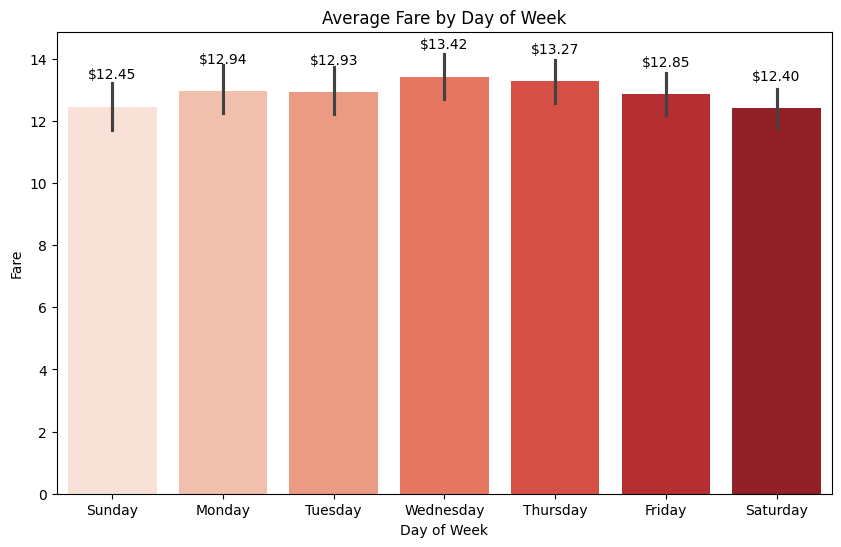

In [75]:
plt.figure(figsize=(10,6))
ax = sns.barplot(data=df, x='trip_day', y='fare', order=weekday_order, palette='Reds')
for container in ax.containers:
    ax.bar_label(container, fmt='$%.2f', padding=18)

ax.set_title("Average Fare by Day of Week")
ax.set_xlabel("Day of Week")
ax.set_ylabel("Fare");
plt.savefig('./images/avg_fare_day.png')

> On average, the day with the highest fare is Wednesday

### What is the average trip duration by day?

C:\Users\danie\AppData\Local\Temp\ipykernel_46540\384636857.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df, y='trip_day', x='distance', order=weekday_order, palette='Greens')


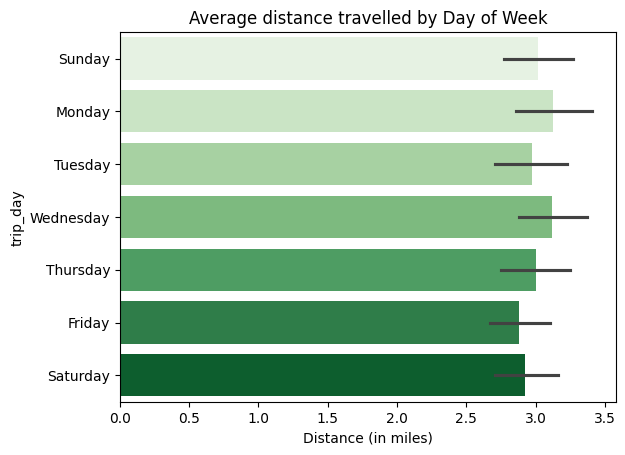

In [76]:
ax = sns.barplot(data=df, y='trip_day', x='distance', order=weekday_order, palette='Greens')
ax.set_title("Average distance travelled by Day of Week")
ax.set_xlabel('Distance (in miles)')
plt.savefig('./images/avg_dur_day_diff.png')

### Where are most customers picked up / dropped off?

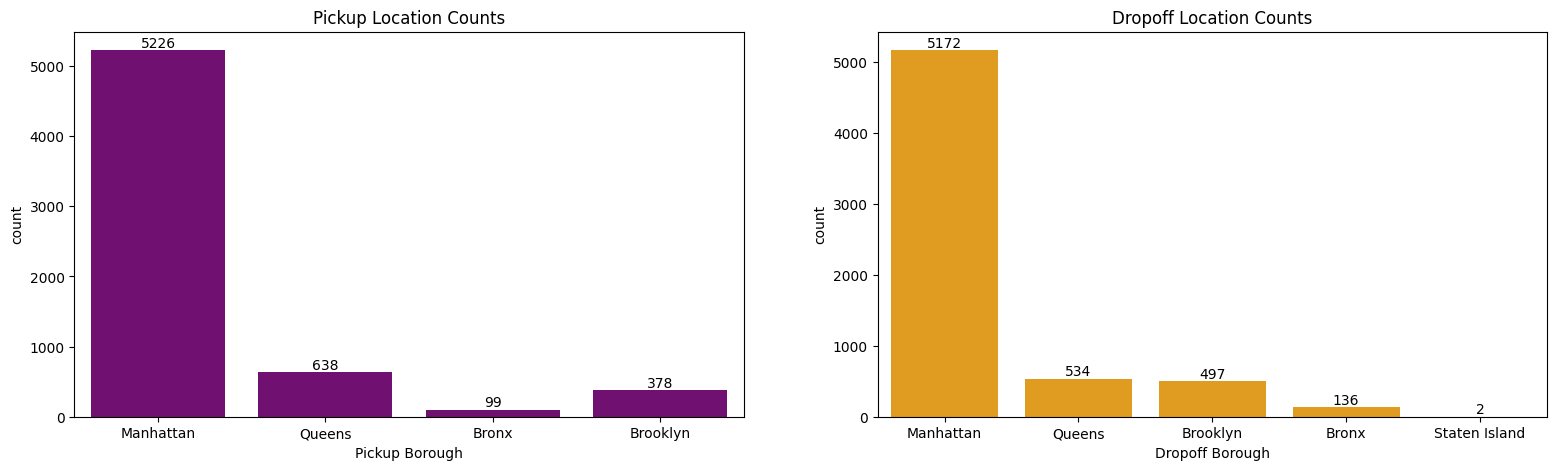

In [77]:
fig, ax = plt.subplots(1, 2, figsize=(19, 5))

ax1 = sns.countplot(data=df, x='pickup_borough', ax=ax[0], color='purple')
for container in ax1.containers:
    ax1.bar_label(container)

ax1.set_title("Pickup Location Counts")
ax1.set_xlabel('Pickup Borough')

ax2 = sns.countplot(data=df, x='dropoff_borough', ax=ax[1], color='orange')
for container in ax2.containers:
    ax2.bar_label(container)

ax2.set_title("Dropoff Location Counts")
ax2.set_xlabel("Dropoff Borough")
plt.savefig('./images/pickup_dropoff.png')

> Looking at the different pickup and dropoff locations, most passengers seem to be going from/to Manhattan. However, something of note is that 2 taxis dropped off on Staten Island, but no one comes from Staten Island, apparently. 

### Which color taxi gets the highest fares?

C:\Users\danie\AppData\Local\Temp\ipykernel_46540\964297472.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df, x='color', y='fare', errorbar=None, palette=palette)


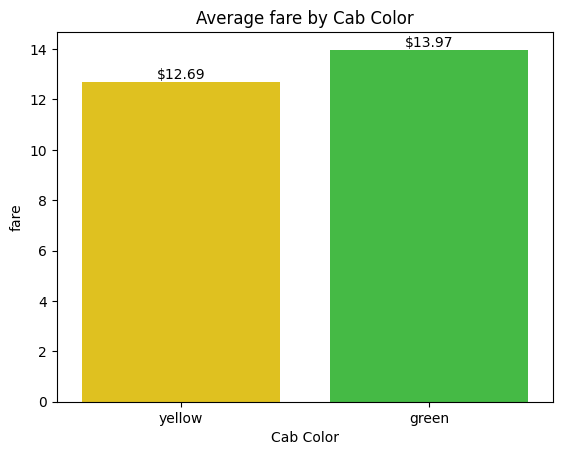

In [78]:
palette = {
    'yellow': 'gold',  # or 'yellow'
    'green': 'limegreen'  # or 'green'
}
ax = sns.barplot(data=df, x='color', y='fare', errorbar=None, palette=palette)
for container in ax.containers:
    ax.bar_label(container, fmt='$%.2f')
ax.set_title("Average fare by Cab Color")
ax.set_xlabel("Cab Color")
plt.savefig('./images/cab_color_fare.png')

<Axes: xlabel='color', ylabel='count'>

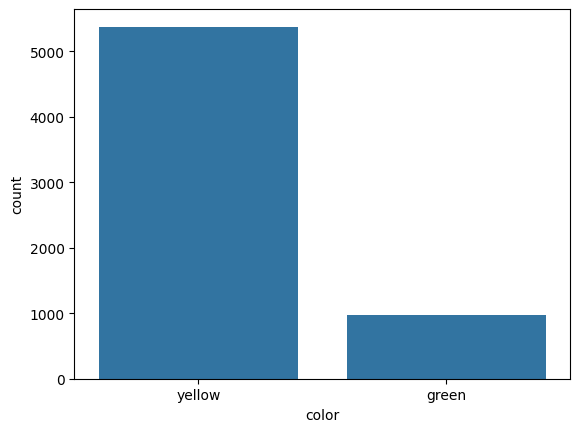

In [79]:
sns.countplot(data=df, x='color')

> Although green cabs make up less than 1/5th of the taxis, they seem to have higher fares on average. 

### What are the busiest times (hours)

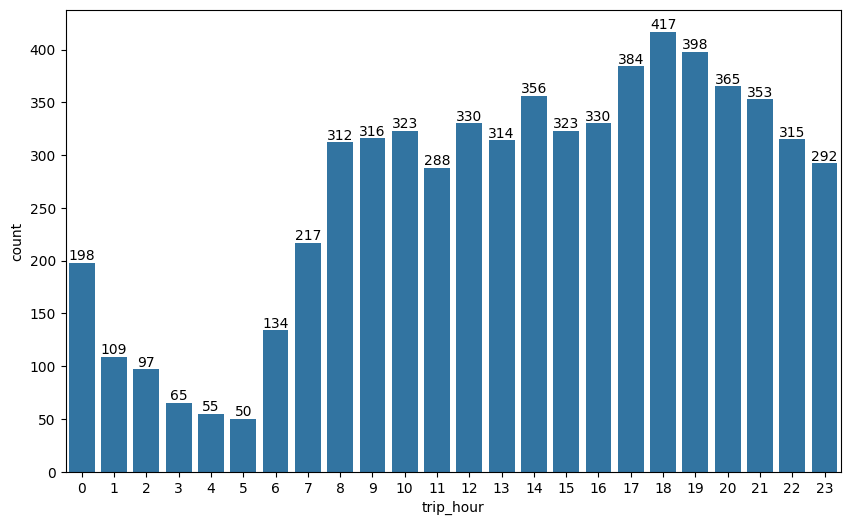

In [80]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x='trip_hour')
ax.bar_label(ax.containers[0]);
plt.savefig('./images/busy_times.png')

> It seems that most trips occur at the 18th hour (6:00 PM), likely people going home from work. 

In [81]:
df.to_csv('./data/cleaned_taxi.csv', index=0)